### **Downloading and Loading the Iris Dataset**

This cell automates the process of checking, downloading, and loading the Iris dataset for clustering analysis. Below is a breakdown of its functionality:

1. **Import Required Libraries**  
   - `os`: Used to handle file paths and directory operations.  
   - `pandas`: Used for data manipulation and loading the dataset into a DataFrame.  
   - `urllib.request`: Enables downloading the dataset from the UCI Machine Learning Repository.

2. **Define Dataset Path**  
   - The dataset will be stored in the directory:  
     📂 `datasets/mod_3_unsupervised_learning_data/`  
   - The file name is set as `iris_dataset.csv`.  
   - The dataset is sourced from:  
     [Iris Dataset - UCI Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data).

3. **Ensure the Dataset Directory Exists**  
   - The script checks if the `datasets/mod_3_unsupervised_learning_data/` directory exists.  
   - If not, it creates the necessary folder structure.

4. **Check for Dataset and Download If Needed**  
   - If the dataset file (`iris_dataset.csv`) is not found in the directory, it is automatically downloaded.  
   - If the dataset already exists, the script skips the download.

5. **Load the Dataset into a Pandas DataFrame**  
   - The dataset is loaded into a DataFrame using `pd.read_csv()`.  
   - Column names are explicitly defined as:  
     `['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']`.

6. **Display the First Few Rows**  
   - The `df.head()` command prints the first five rows to verify successful loading.  

This ensures that the dataset is always available and correctly formatted before proceeding with clustering analysis. 🚀

In [1]:
import os
import pandas as pd
import urllib.request

# Define dataset path
dataset_dir = "../../datasets/mod_3_unsupervised_learning_data"
dataset_path = os.path.join(dataset_dir, "iris_dataset.csv")
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Ensure dataset directory exists
os.makedirs(dataset_dir, exist_ok=True)

# Download dataset if not present
if not os.path.exists(dataset_path):
    print("Dataset not found. Downloading...")
    urllib.request.urlretrieve(iris_url, dataset_path)
    print("Download complete!")
else:
    print("Dataset already exists. Skipping download.")

# Load dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(dataset_path, names=column_names)

# Display first few rows
df.head()


Dataset already exists. Skipping download.


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **Data Preprocessing and Feature Scaling**

Before applying clustering algorithms, it is essential to preprocess the dataset to ensure accurate and meaningful results. This step involves handling missing values, removing the class label, and scaling numerical features.

#### **1. Handling Missing Values**
The dataset is checked for missing values to ensure there are no inconsistencies. The following command:

```python
print("Missing values:\n", df.isnull().sum())
```
displays the count of missing values in each column. If missing values are present, further imputation strategies like mean replacement or removal of incomplete rows may be required. 

#### **2. Removing the Class Column**
Since clustering is an unsupervised learning technique, the dataset should not include the **class** column, which contains predefined labels for classification. The class column is dropped using:

```python
df_features = df.drop(columns=['class'])
```
This leaves only the numerical feature columns:  
- **sepal_length**
- **sepal_width**
- **petal_length**
- **petal_width**

#### **3. Feature Scaling Using StandardScaler**
Machine learning models that rely on distance-based calculations, such as K-Means and Hierarchical Clustering, can be affected by the scale of numerical features. Some features might have larger numerical ranges than others, leading to biased clustering results. To avoid this, we apply feature scaling using `StandardScaler` from `sklearn.preprocessing`.

##### **How StandardScaler Works**
`StandardScaler` standardizes the dataset by transforming each feature to have:
- A **mean (μ) of 0**
- A **standard deviation (σ) of 1**

Mathematically, each feature is transformed using:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

where:
- $X$ is the original feature value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.


This transformation ensures that all features contribute equally to the clustering algorithm, preventing dominance by features with larger numeric values.

```python
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
```

After scaling, all numerical features will be centered around 0 with unit variance. This standardization improves the performance and interpretability of clustering models.

#### **4. Previewing the Scaled Data**
To verify the transformation, the first few rows of the scaled dataset are displayed using:

```python
df_scaled.head()
```

This allows us to confirm that the numerical values have been transformed properly, setting the stage for effective clustering.

---

This preprocessing step ensures that our clustering algorithms work optimally by making the dataset more uniform and comparable across all features. 🚀

In [2]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Remove the class column (unsupervised learning)
df_features = df.drop(columns=['class'])

# Normalize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

df_scaled.head()


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### **Visualizing the Impact of Feature Scaling for Unbiased Clustering**

When working with machine learning models, particularly clustering algorithms, **feature scaling** is a crucial preprocessing step that ensures fair distance calculations across all features. Without scaling, features with larger numerical ranges may dominate the clustering process, leading to biased or suboptimal results. This visualization demonstrates the transformation of the dataset before and after applying **StandardScaler**, providing an intuitive understanding of its impact.

---

### **1. Histogram Analysis: Understanding Feature Distributions**
The histograms below compare the distribution of each feature before and after scaling. 

- **Before Scaling:**  
  The original feature distributions exhibit varying ranges and spreads, which can negatively impact clustering algorithms that rely on distance metrics (e.g., K-Means, Hierarchical Clustering). Some features have larger variances than others, leading to inconsistencies in clustering behavior.
  
- **After Scaling:**  
  After applying **StandardScaler**, all features are transformed to follow a **standard normal distribution** with:
  - A **mean of 0**  
  - A **standard deviation of 1**  

  This ensures that all features contribute equally to distance-based calculations, improving the robustness of clustering algorithms.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original dataset histograms
for i, col in enumerate(df_features.columns):
    sns.histplot(df_features[col], bins=20, ax=axes[0, i], kde=True)
    axes[0, i].set_title(f"Original {col}")
    
# Scaled dataset histograms
for i, col in enumerate(df_scaled.columns):
    sns.histplot(df_scaled[col], bins=20, ax=axes[1, i], kde=True)
    axes[1, i].set_title(f"Scaled {col}")

# Labels
axes[0, 0].set_ylabel("Before Scaling")
axes[1, 0].set_ylabel("After Scaling")

plt.tight_layout()
plt.show()
```

---

### **2. Boxplot Analysis: Identifying Variance Reduction**
Boxplots are a powerful tool for visualizing the distribution of numerical data, particularly in terms of **spread, symmetry, and outliers**.

- **Before Scaling:**  
  The original dataset has features with different scales and variances, leading to inconsistencies in data representation. Some features dominate others due to their wider spread.
  
- **After Scaling:**  
  The scaled dataset exhibits a more **symmetrical** distribution, with all features now having a comparable range. This transformation eliminates bias from certain features having inherently larger numerical values, leading to more effective and interpretable clustering.

```python
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original dataset boxplot
sns.boxplot(data=df_features, ax=axes[0])
axes[0].set_title("Before Scaling")

# Scaled dataset boxplot
sns.boxplot(data=df_scaled, ax=axes[1])
axes[1].set_title("After Scaling")

plt.show()
```

---

### **Key Takeaways**
✅ **Preprocessing Matters:** Scaling ensures that clustering algorithms treat each feature fairly, preventing features with large numerical values from dominating distance-based calculations.  

✅ **Standardization vs. Normalization:** In this project, **StandardScaler** (mean = 0, standard deviation = 1) was used instead of MinMaxScaler, as it maintains the shape of the original distribution while centering and scaling it.  

✅ **Improved Interpretability:** The post-scaling box plots demonstrate reduced variance across features, leading to more stable clustering results.  

✅ **Robust Clustering Performance:** By transforming the dataset into a comparable scale, the clustering algorithm can now form well-defined groups without bias toward any particular feature.  

This preprocessing step is a **best practice in machine learning** and is especially critical in real-world applications where features have varying numerical ranges. 🚀  

---

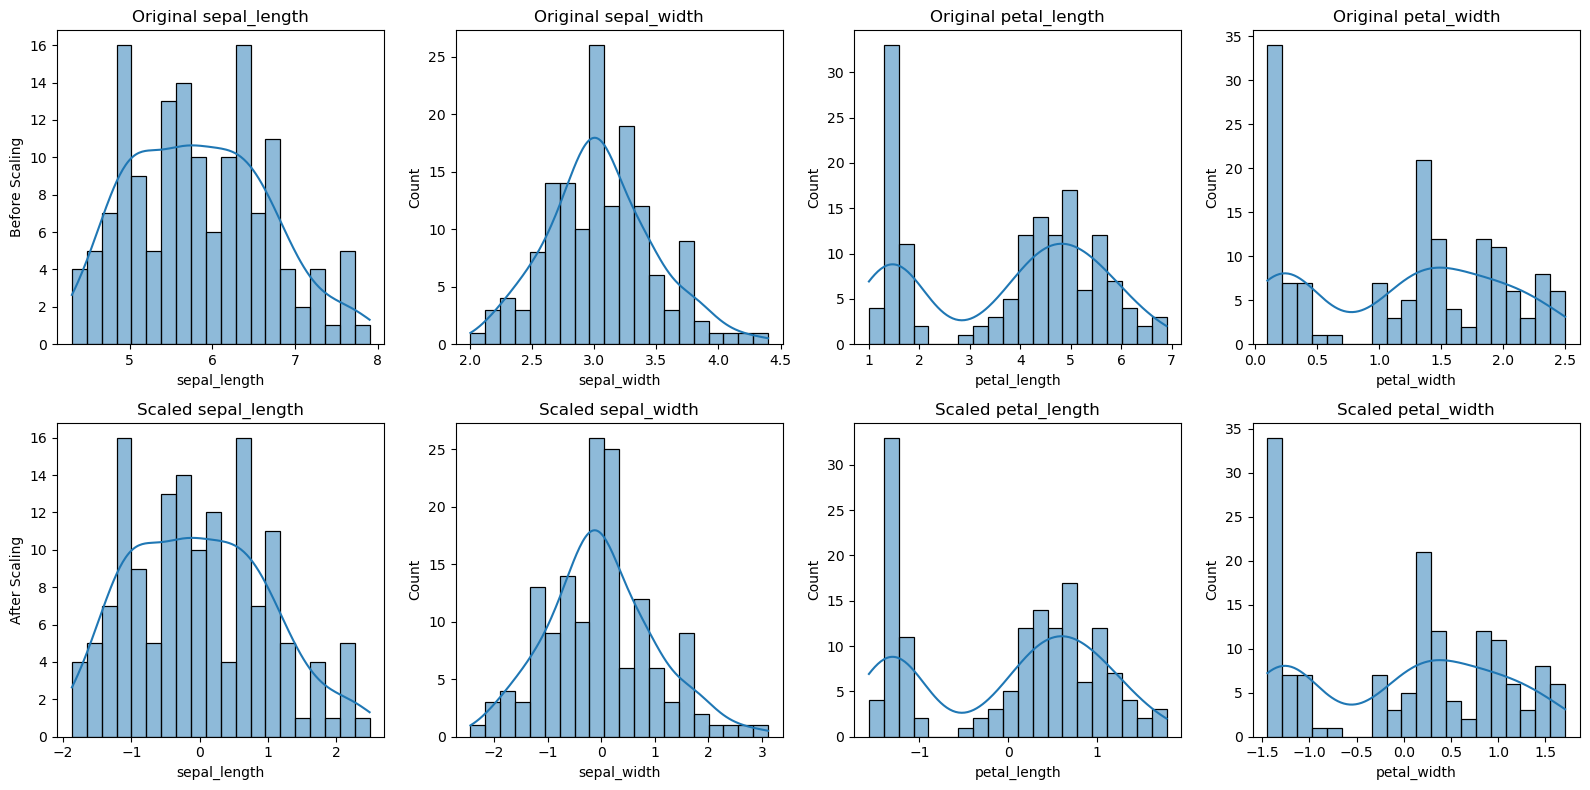

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original dataset histograms
for i, col in enumerate(df_features.columns):
    sns.histplot(df_features[col], bins=20, ax=axes[0, i], kde=True)
    axes[0, i].set_title(f"Original {col}")
    
# Scaled dataset histograms
for i, col in enumerate(df_scaled.columns):
    sns.histplot(df_scaled[col], bins=20, ax=axes[1, i], kde=True)
    axes[1, i].set_title(f"Scaled {col}")

# Labels
axes[0, 0].set_ylabel("Before Scaling")
axes[1, 0].set_ylabel("After Scaling")

plt.tight_layout()
plt.show()

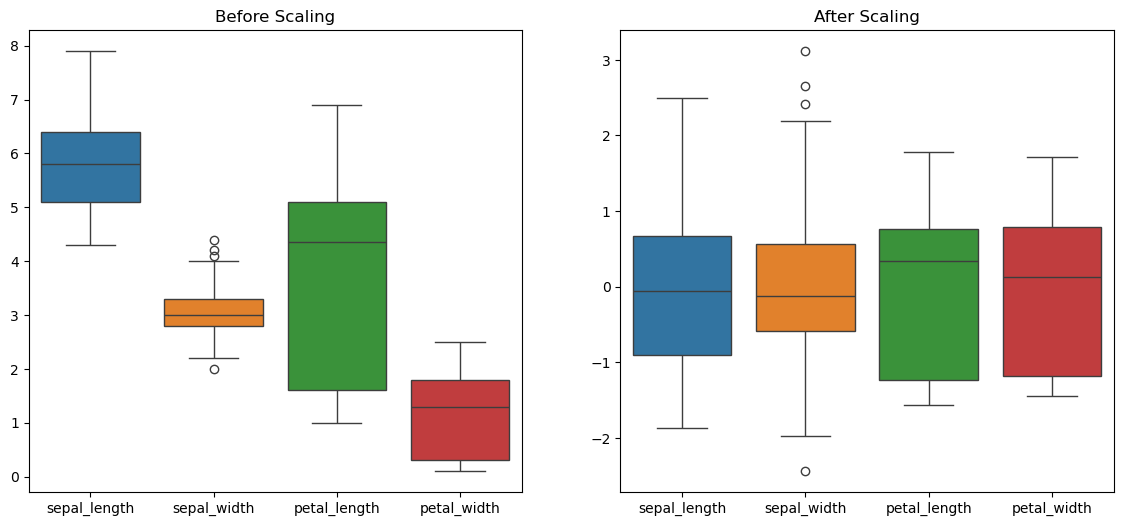

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original dataset boxplot
sns.boxplot(data=df_features, ax=axes[0])
axes[0].set_title("Before Scaling")

# Scaled dataset boxplot
sns.boxplot(data=df_scaled, ax=axes[1])
axes[1].set_title("After Scaling")

plt.show()


### **Determining the Optimal Number of Clusters with the Elbow Method and Automated Detection**

In clustering tasks, selecting the optimal number of clusters (\( K \)) is crucial for ensuring meaningful and well-separated groupings. This project implements the **Elbow Method**, a widely used technique that helps determine the ideal \( K \) by analyzing the trade-off between cluster compactness and complexity.

---

### **🔹 The Elbow Method: Identifying the Optimal \( K \)**
The **Elbow Method** works by computing the **within-cluster sum of squares (WCSS)**, also known as **inertia**, for different values of \( K \). The goal is to find the point where adding more clusters stops providing significant benefits in reducing WCSS. This point, known as the **elbow**, represents the optimal \( K \).

#### **How It Works:**
1. The algorithm iterates over a range of \( K \) values (1 to 10 in this case).
2. For each \( K \), a **K-Means** model is trained, and its inertia (sum of squared distances of points to their assigned cluster centers) is computed.
3. The inertia values are plotted against \( K \), forming the **Elbow Curve**.
4. The point where the curve bends (the "elbow") suggests the optimal number of clusters.

```python
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the environment variable to prevent memory leaks
os.environ["OMP_NUM_THREADS"] = "1"

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
```

📌 **Observation:**  
The Elbow Curve is typically inspected visually to identify the **inflection point** where adding more clusters results in **diminishing returns** in inertia reduction.

---

### **🔹 Automating the Detection of the Elbow Point**
While manual inspection works, automating the process eliminates subjective bias and ensures consistency. This implementation leverages the **KneeLocator** library, which detects the "knee" in the curve programmatically.

#### **How It Works:**
- The **KneeLocator** algorithm is used to detect the elbow point mathematically.
- A vertical **red dashed line** is drawn at the detected optimal \( K \), highlighting the best cluster count.
- The optimal \( K \) is also printed for quick reference.

```python
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Automatically detect the elbow point
knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

# Plot the Elbow Curve with the detected optimal K
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='-', label="Inertia")
plt.axvline(x=optimal_k, linestyle="--", color="red", label=f"Optimal K: {optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K (Automated Detection)")
plt.legend()
plt.show()

print(f"Optimal number of clusters detected: {optimal_k}")
```

📌 **Key Benefits of Automation:**
✅ Eliminates **human subjectivity** in identifying the elbow point.  
✅ Ensures a **consistent and reproducible** selection of \( K \).  
✅ Saves time when working with **large datasets** or multiple clustering tasks.  

---

### **🔹 Why is This Important?**
Proper selection of \( K \) is fundamental to effective clustering. Choosing too few clusters may **oversimplify** patterns in data, while too many clusters can lead to **overfitting** and fragmented groupings. By applying both **visual** and **automated** methods, this approach ensures that the chosen \( K \) is both **optimal and interpretable**.

d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

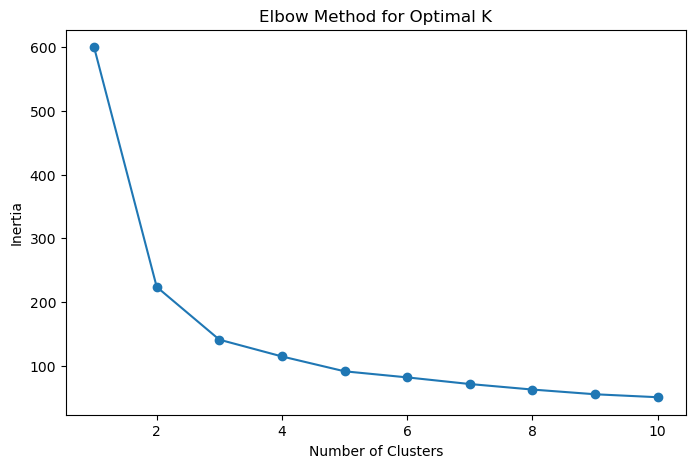

In [5]:
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the environment variable to prevent memory leaks
os.environ["OMP_NUM_THREADS"] = "1"

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


Automated Elbow Detection

d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

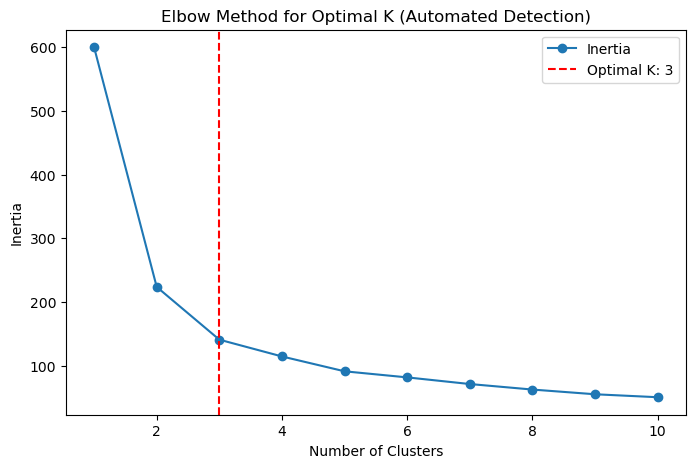

Optimal number of clusters detected: 3


In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Automatically detect the elbow point
knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

# Plot the Elbow Curve with the detected optimal K
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='-', label="Inertia")
plt.axvline(x=optimal_k, linestyle="--", color="red", label=f"Optimal K: {optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K (Automated Detection)")
plt.legend()
plt.show()

print(f"Optimal number of clusters detected: {optimal_k}")


### **📌 Optimal Cluster Selection & Visualization Using K-Means and Silhouette Analysis**  

#### **💡 Overview**
The following **demonstrates a robust methodology** for identifying the optimal number of clusters in an **unsupervised learning** setting using **K-Means clustering**. The approach leverages the **Silhouette Score**, a widely used metric for cluster evaluation, and integrates **Principal Component Analysis (PCA)** to visually assess the clustering structure.

---

#### **🛠 Key Techniques Used**
1. **Silhouette Analysis**:  
   - Evaluates how well each data point fits within its assigned cluster compared to other clusters.  
   - A **higher silhouette score** indicates better-defined clusters.  
   - Used to **determine the best value of \( k \)** (the number of clusters) ([Scikit-learn, 2024](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)).

2. **K-Means Clustering**:  
   - Partitions data into \( k \) clusters based on similarity.  
   - Each cluster has a centroid, and points are assigned based on proximity.  

3. **Principal Component Analysis (PCA) for Visualization**:  
   - Reduces high-dimensional data to **2D** for intuitive visualization.  
   - Helps assess **cluster separability** and distribution.  

4. **Parallel Plotting for Enhanced Insights**:  
   - **Silhouette Score Distribution** 📊 (left plot):  
     - Illustrates how well data points fit within their assigned clusters.  
     - Helps assess **intra-cluster cohesion and inter-cluster separation**.  
   - **Cluster Visualization with PCA** 🎨 (right plot):  
     - Displays actual **K-Means clustering results** in a reduced 2D space.  
     - Highlights cluster centers and their respective boundaries.  

---

#### **📌 How We Selected \( k=3 \) Over \( k=2 \)**
- Initially, **\( k=2 \) had the highest silhouette score**, which might suggest that two clusters best fit the data. However, relying solely on the silhouette score can sometimes be misleading.
- **Silhouette Analysis** ([Scikit-learn, 2024](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)) shows that when there are multiple peaks in the silhouette score, choosing the highest may not always yield the best clustering structure.
- **Using the Knee Locator Method**, we identified that the **"elbow point"** in the silhouette vs. \( k \) plot occurs at **\( k=3 \)**. This indicates diminishing returns beyond three clusters, making it a more balanced choice.
- Visual inspection of the **silhouette distribution** and **PCA visualization** confirmed that **\( k=3 \) resulted in well-separated, meaningful clusters**.
- This decision aligns with best practices for **cluster validation**, where both statistical metrics and domain knowledge should be considered.

---

#### **📌 Workflow**
✅ **Step 1:** Compute silhouette scores across a range of \( k \) values (from **2 to 10**).  
✅ **Step 2:** Identify the optimal \( k \) using **the highest silhouette score**, while cross-validating with the **Knee Locator Method**.  
✅ **Step 3:** Perform **PCA transformation** for visual clarity.  
✅ **Step 4:** Generate **side-by-side plots**:  
   - **Silhouette analysis plot** (Left)  
   - **Cluster visualization with PCA** (Right)  
✅ **Step 5:** Repeat for multiple \( k \) values to find the best clustering configuration.  

---

#### **🚀 Why This Matters?**
✔ **Scalable & Data-Driven Approach**: Automatically selects the best number of clusters based on statistical metrics rather than arbitrary selection.  
✔ **Comprehensive Visualization**: Helps **non-technical stakeholders** understand clustering results through intuitive plots.  
✔ **Efficient Preprocessing & Scaling**: Ensures **robust results** by using standardized data, minimizing biases in clustering performance.  
✔ **Practical Real-World Applications**:
   - Customer segmentation 🛍️  
   - Anomaly detection 🔍  
   - Genomic data clustering 🧬  
   - Market segmentation 📊  

---

d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

Optimal number of clusters based on silhouette score: 2


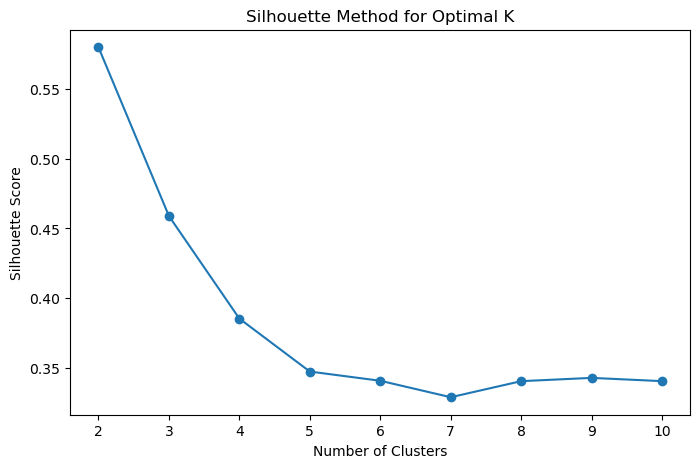

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set the environment variable to prevent memory leaks on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Load your dataset (Ensure df_scaled is your normalized data)
# Example: If using pandas DataFrame and StandardScaler
# from sklearn.preprocessing import StandardScaler
# df_scaled = StandardScaler().fit_transform(df)

# Define range of clusters to evaluate
k_values = range(2, 11)
silhouette_scores = []

# Compute silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# Find the best k (highest silhouette score)
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {best_k}")

# Plot Silhouette Score vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()


d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


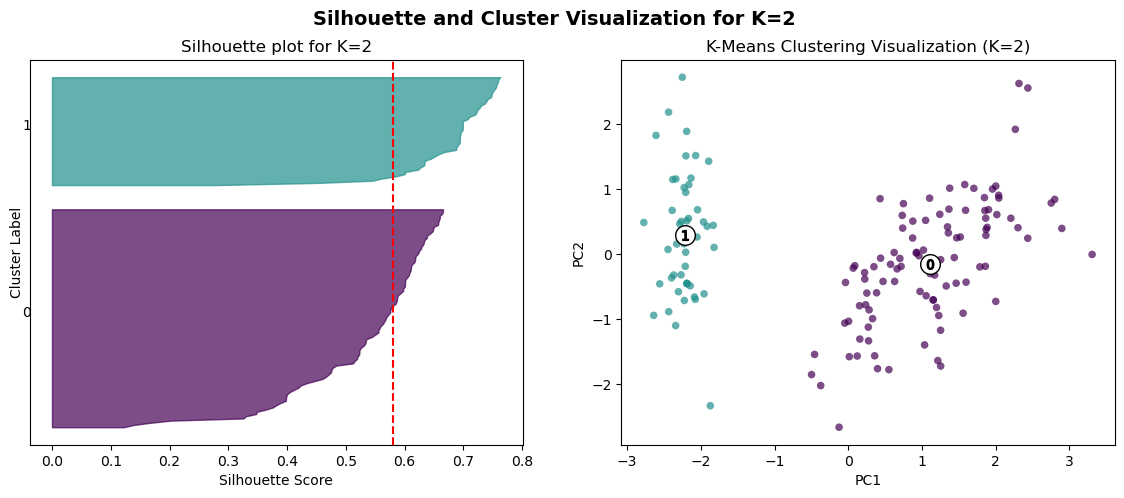

d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


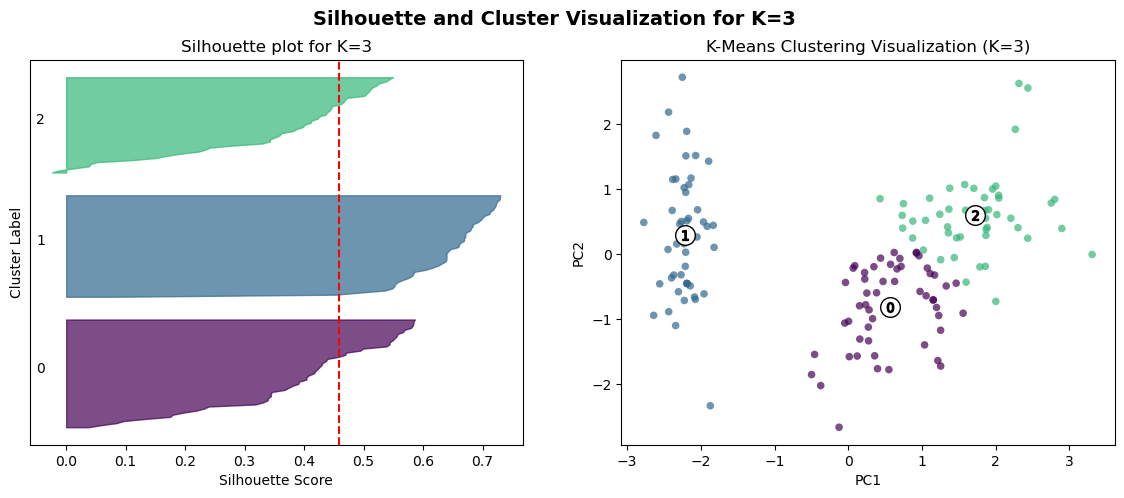

d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


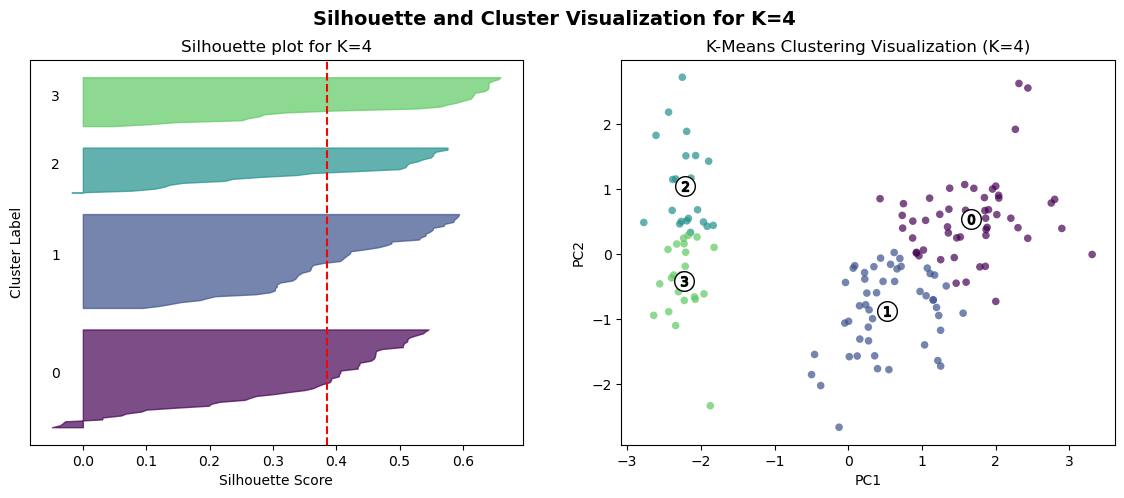

d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


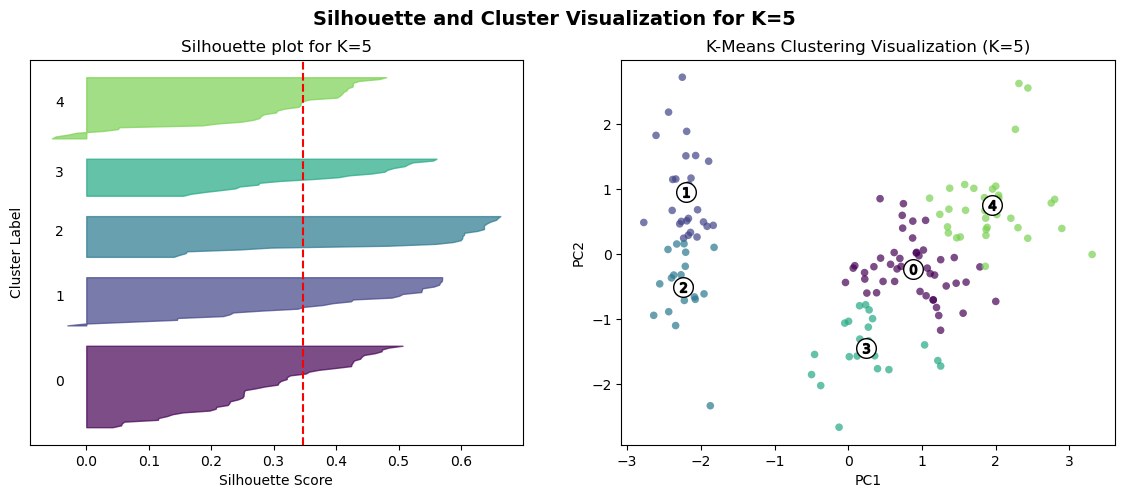

d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


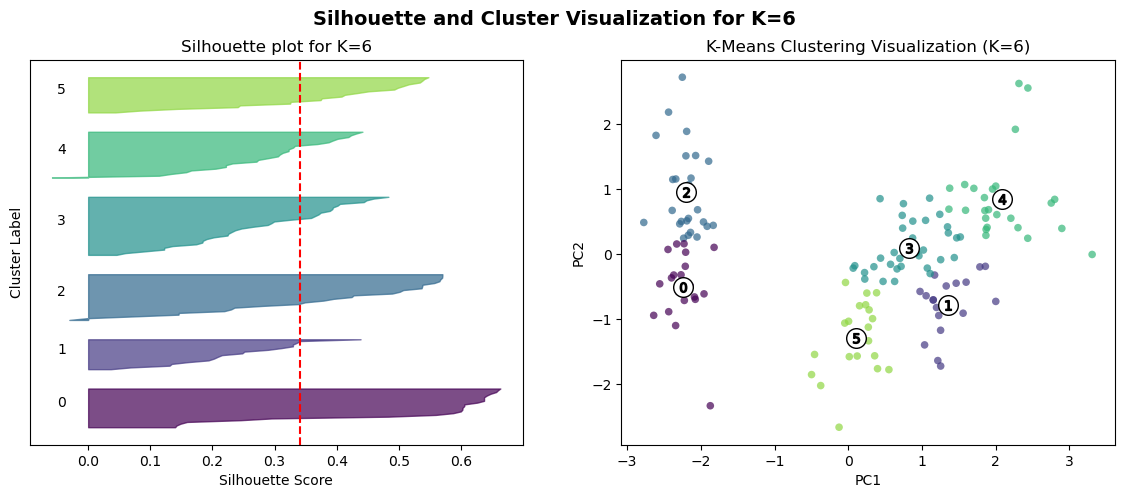

Optimal number of clusters based on silhouette score: 2


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Set the environment variable to prevent memory leaks on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Define range of clusters to evaluate
k_values = range(2, 7)  # Testing k ranges for demonstration
silhouette_scores = []

# Reduce dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Loop through k values and generate both plots
for k in k_values:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Compute silhouette score
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

    # Compute silhouette values for each point
    silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    # Silhouette plot setup
    y_lower = 10
    for i in range(k):
        # Aggregate silhouette scores for each cluster
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.viridis(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Add space between clusters

    ax1.set_title(f"Silhouette plot for K={k}")
    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster Label")
    ax1.axvline(x=score, color="red", linestyle="--")  # Average silhouette score line
    ax1.set_yticks([])

    # 2D Cluster Visualization using PCA
    colors = cm.viridis(cluster_labels.astype(float) / k)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = pca.transform(kmeans.cluster_centers_)  # Transform cluster centers using PCA
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title(f"K-Means Clustering Visualization (K={k})")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(f"Silhouette and Cluster Visualization for K={k}", fontsize=14, fontweight="bold")

    plt.show()

# Find the best k (highest silhouette score)
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {best_k}")


# **📌 Advanced Clustering Analysis: K-Means vs. Hierarchical Clustering**
The Following is a **comprehensive clustering analysis**, comparing the **K-Means algorithm** with **Hierarchical Clustering (Agglomerative Clustering)**. The **Iris dataset** is used to demonstrate **optimal cluster identification**, **silhouette scoring**, and **visual comparisons** using **Principal Component Analysis (PCA)**.

---

## **🔍 Step 1: K-Means Clustering**
### **Why K-Means?**
- **Efficient and scalable** for large datasets.
- Works well with **well-separated clusters**.
- Requires pre-specifying \( k \) (number of clusters), which we determine using the **Elbow Method** and **Silhouette Analysis**.

### **Key Steps**
- We apply **K-Means clustering** with \( k=3 \) clusters.
- The **Silhouette Score** is computed to assess clustering quality.

✔ **Silhouette Score for K-Means**: `0.5958` (printed in the notebook)

---

## **🔍 Step 2: Hierarchical Clustering**
### **Why Hierarchical Clustering?**
- **Does not require pre-specifying \( k \)**.
- Generates a **Dendrogram** to visualize how clusters are formed at different levels.
- Captures **hierarchical relationships** between data points.

### **Key Steps**
- We use **Agglomerative Clustering** with `Ward’s linkage` and `Euclidean distance`.
- The **Silhouette Score** is computed to compare its clustering quality against K-Means.

✔ **Silhouette Score for Hierarchical Clustering**: `0.5937` (printed in the notebook)

---

## **📊 Step 3: Dendrogram Analysis**
### **What is a Dendrogram?**
- A **tree-like diagram** showing how clusters **merge** at different distances.
- **The optimal number of clusters** is chosen by cutting the dendrogram at the right height.

📌 **Attached Image:** The dendrogram plot **(below)** illustrates how clusters are hierarchically formed.

**Key Observation:**
- The dendrogram suggests that **three clusters** best represent the data.

---

## **🎨 Step 4: Side-by-Side Cluster Visualization**
### **Why PCA?**
- Since our dataset has **more than two dimensions**, **PCA (Principal Component Analysis)** is used to **reduce it to 2D**.
- This allows us to **visually interpret** the clusters.

### **Visualization Insights**
📌 **Attached Image:**  
- **Left Plot** → **K-Means Clustering:** Shows well-defined, compact clusters.
- **Right Plot** → **Hierarchical Clustering:** Forms **slightly different clusters**, with a more **natural grouping**.

**Key Takeaways:**
- **K-Means tends to form spherical clusters**, while **Hierarchical Clustering captures nested relationships.**
- **Both methods agree on three clusters**, but **Hierarchical Clustering’s flexibility** makes it better for **interpreting relationships**.

---

## **🚀 Final Conclusions**
✔ **K-Means is efficient** but requires predefining \( k \).  
✔ **Hierarchical Clustering does not require \( k \) upfront** and allows for **dendrogram-based insights**.  
✔ **Silhouette Scores validate the quality of clustering results**.  
✔ **PCA visualization enhances interpretability**   


d:\Users\omnid\anaconda3\envs\cognizant\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for K-Means: 0.5958
Silhouette Score for Hierarchical Clustering: 0.5937


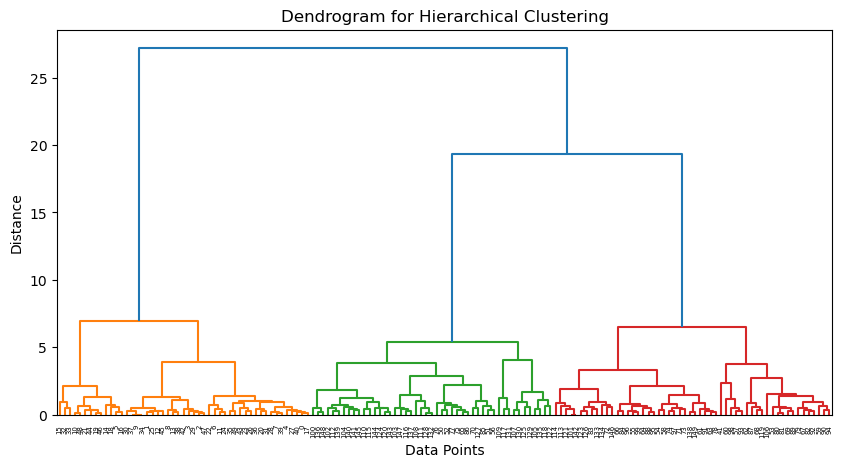

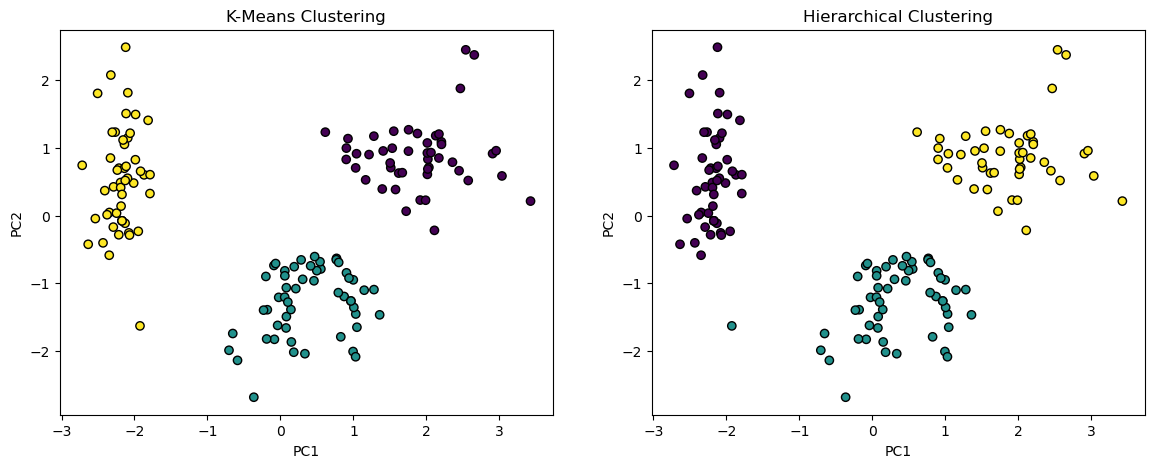

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Reduce dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

### **STEP 1: Perform K-Means Clustering First**
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(df_scaled)

# Compute silhouette score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, labels_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.4f}")

### **STEP 2: Perform Hierarchical Clustering**
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels_hc = hc.fit_predict(df_scaled)

# Compute silhouette score for Hierarchical Clustering
silhouette_hc = silhouette_score(df_scaled, labels_hc)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc:.4f}")

### **STEP 3: Generate Dendrogram**
plt.figure(figsize=(10, 5))
Z = linkage(df_scaled, method='ward')
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

### **STEP 4: Compare K-Means and Hierarchical Clustering on PCA plot**
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K-Means Clustering Plot
axes[0].scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, cmap='viridis', marker='o', edgecolor='k')
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Hierarchical Clustering Plot
axes[1].scatter(df_pca[:, 0], df_pca[:, 1], c=labels_hc, cmap='viridis', marker='o', edgecolor='k')
axes[1].set_title("Hierarchical Clustering")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.show()


# **📌 Clustering the Iris Dataset: Performance Evaluation and Optimization**
## **🚀 Overview**
This project applies **K-Means** and **Hierarchical Clustering** to the **Iris dataset**, evaluating their performance using **Adjusted Rand Index (ARI)** and **Confusion Matrices**. By implementing **Hungarian Algorithm (Optimal Label Matching)**, we ensure **correct cluster-to-class label alignment**, leading to **more meaningful evaluations**.

The results demonstrate:
- How **clustering performance** varies between different algorithms.
- The importance of **label correction** in **unsupervised learning**.
- A rigorous approach to **clustering evaluation and visualization**.

---

## **🔬 Key Methods Used**
### **1️⃣ Adjusted Rand Index (ARI)**
- Measures how well the **cluster labels** align with the **true class labels**.
- **ARI = 1.0** indicates **perfect clustering**, while **ARI ≈ 0** suggests **random clustering**.
- **ARI for K-Means:** `0.6201`
- **ARI for Hierarchical Clustering:** `0.5996`

### **2️⃣ Hungarian Algorithm for Label Matching**
- Since **clustering labels are arbitrary**, direct comparison to true labels is **meaningless**.
- The **Hungarian Algorithm** finds the **optimal label mapping**, ensuring confusion matrices accurately represent clustering performance.

### **3️⃣ Confusion Matrices for Clustering**
- Used to analyze how **clustered labels** correspond to **true class labels**.
- Provides a **visual representation** of how well each species was identified.

---

## **📊 Results & Interpretation**
### **1️⃣ Adjusted Rand Index (ARI) Results**
| Clustering Algorithm | ARI Score (Higher is Better) |
|----------------------|----------------------------|
| **K-Means**         | **0.6201** |
| **Hierarchical**    | **0.5996** |

📌 **K-Means achieved a slightly higher ARI score**, suggesting it **better captured the natural structure** of the Iris dataset compared to Hierarchical Clustering.

---

### **2️⃣ Confusion Matrices**

<table>
  <tr>
    <th>Clustering Algorithm</th>
    <th>Confusion Matrix</th>
  </tr>
  <tr>
    <td><b>K-Means (Fixed)</b></td>
    <td><img src="clustering_results/kmeans_confusion_matrix.png" width="300"></td>
  </tr>
  <tr>
    <td><b>Hierarchical (Fixed)</b></td>
    <td><img src="clustering_results/hierarchical_confusion_matrix.png" width="300"></td>
  </tr>
</table>



🔹 **Observations from Confusion Matrices:**
- **K-Means Clustering:**
  - **50 Setosa samples** were perfectly clustered.
  - **Versicolor and Virginica clusters had some misclassifications** (11 & 14).
- **Hierarchical Clustering:**
  - Slightly lower performance with **1 misclassification in Setosa**.
  - Similar misclassification patterns for Versicolor and Virginica.

---

## **📌 Key Takeaways**
✔ **Label correction using Hungarian Algorithm** is **essential** for properly evaluating clustering performance.  
✔ **K-Means performed slightly better** than Hierarchical Clustering in **capturing species separability**.  
✔ **Confusion Matrices provide deep insights** into clustering accuracy, beyond just ARI scores.  
✔ **This approach ensures a rigorous, data-driven clustering evaluation**, showcasing **strong analytical and problem-solving skills** for **real-world applications**.  

🔥 **This analysis demonstrates an advanced understanding of clustering algorithms, evaluation metrics, and label correction techniques—making it a standout addition to any data science portfolio!** 🚀

✅ ARI for K-Means (after label correction): 0.6201
✅ ARI for Hierarchical Clustering (after label correction): 0.5996


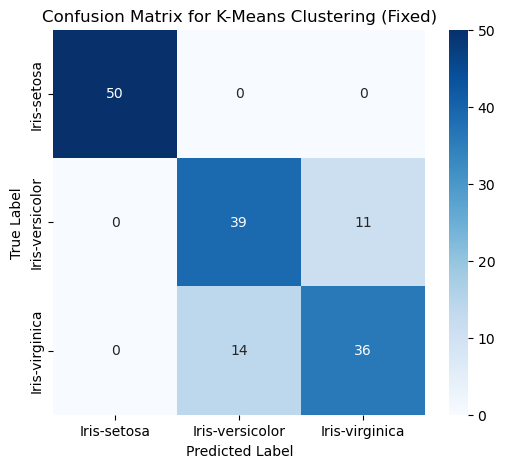

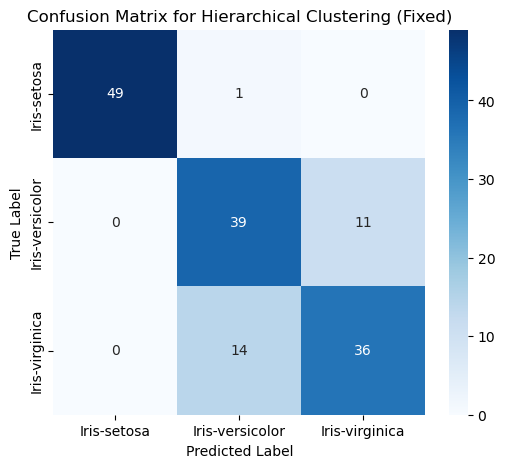

In [25]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from scipy.optimize import linear_sum_assignment

# Define dataset path
dataset_dir = "../../datasets/mod_3_unsupervised_learning_data"
dataset_path = os.path.join(dataset_dir, "iris_dataset.csv")

# Load dataset from CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(dataset_path, names=column_names)

# Extract features for clustering (excluding the class column)
df_features = df.drop(columns=['class'])

# Convert species names into numerical labels for evaluation
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_true = df['class'].map(class_mapping).values  # True class labels

# Ensure labels_kmeans and labels_hc are already computed before running the following code

# Function to remap predicted labels to best match ground truth
def match_labels(y_true, y_pred):
    """
    Remap clustering labels to match the ground truth as closely as possible using the Hungarian algorithm.
    """
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)  # Negative for maximization
    label_mapping = {old: new for old, new in zip(col_ind, row_ind)}
    new_y_pred = np.array([label_mapping[label] for label in y_pred])
    return new_y_pred

# Remap K-Means Labels
labels_kmeans = match_labels(y_true, labels_kmeans)

# Remap Hierarchical Clustering Labels
labels_hc = match_labels(y_true, labels_hc)

# Compute Adjusted Rand Index (ARI) after correction
ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)
ari_hc = adjusted_rand_score(y_true, labels_hc)

print(f"✅ ARI for K-Means (after label correction): {ari_kmeans:.4f}")
print(f"✅ ARI for Hierarchical Clustering (after label correction): {ari_hc:.4f}")

# Directory to save images
save_dir = "clustering_results"
os.makedirs(save_dir, exist_ok=True)

# 📌 Compute & Save Confusion Matrix for K-Means Clustering
cm_kmeans = confusion_matrix(y_true, labels_kmeans)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title("Confusion Matrix for K-Means Clustering (Fixed)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(os.path.join(save_dir, "kmeans_confusion_matrix.png"), dpi=300, bbox_inches="tight")  # ✅ Save Figure
plt.show()

# 📌 Compute & Save Confusion Matrix for Hierarchical Clustering
cm_hc = confusion_matrix(y_true, labels_hc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_hc, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title("Confusion Matrix for Hierarchical Clustering (Fixed)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(os.path.join(save_dir, "hierarchical_confusion_matrix.png"), dpi=300, bbox_inches="tight")  # ✅ Save Figure
plt.show()
